In [518]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [519]:
df = pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [520]:
df.shape

(400, 11)

In [521]:
#checking name of the columnas
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [522]:
#finding null values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [523]:
#for duplicated entries in dataset
df.duplicated().sum()

0

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# Outliers detecting and treatment

In [525]:
#lets check distribution of every column with help of describe fuction and boxplot
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


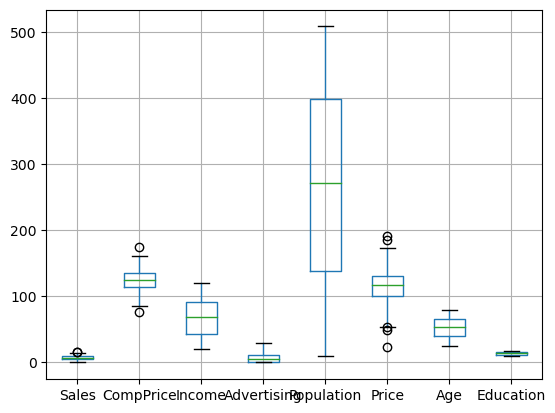

In [526]:
df.boxplot()
plt.show();

It seems that their are not much affect of this outliers to model, so we will not remove them.

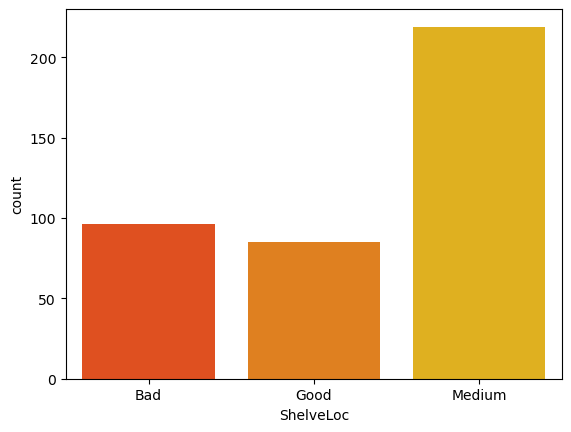

In [527]:
#Analysis for catagorical feature with count plot
sns.countplot(df['ShelveLoc'],palette='autumn')
plt.show()

dataset has large count of mediam quality of shalf location and low count of good quality of shelf location,it show that this column can be affected to the target column

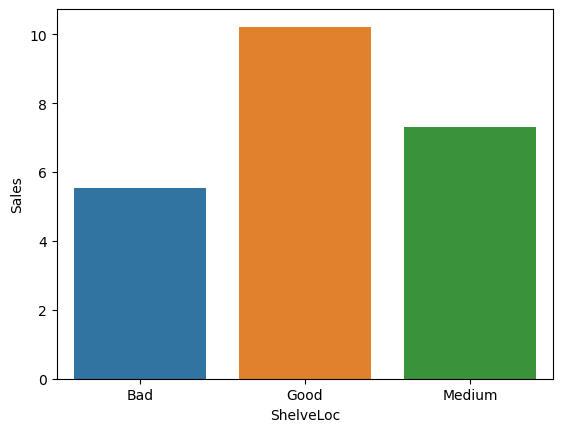

In [528]:
sns.barplot(data=df, x='ShelveLoc',y='Sales',ci=False)
plt.show();

good shelf location gives increase in sales

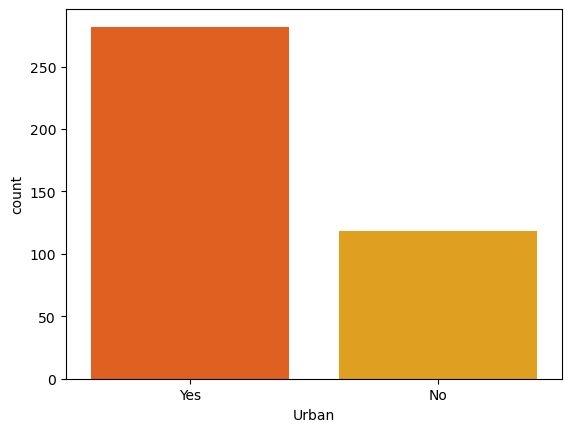

In [529]:
sns.countplot(df['Urban'],palette='autumn')
plt.show();

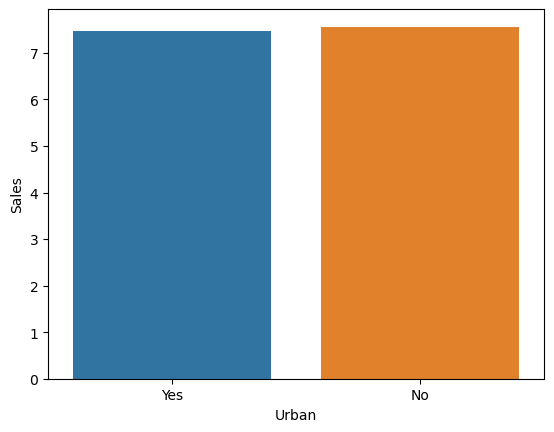

In [530]:
sns.barplot(data=df, x='Urban',y='Sales',ci=False)   
plt.show();

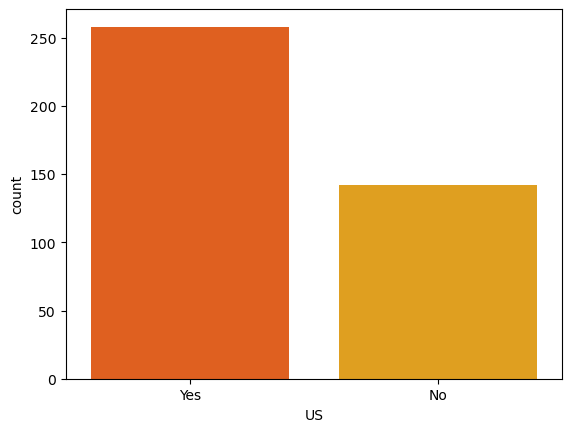

In [531]:
sns.countplot(df['US'],palette='autumn')
plt.show();

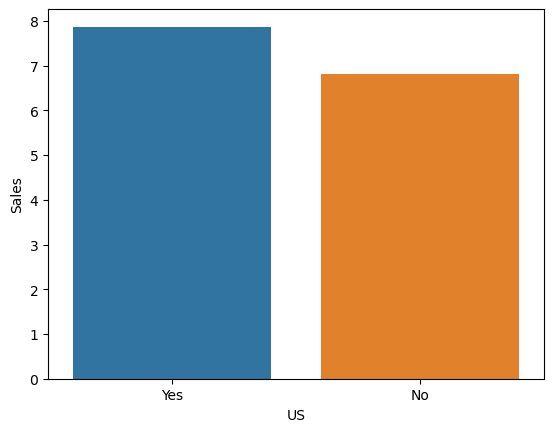

In [532]:
sns.barplot(data=df, x='US',y='Sales',ci=False)    
plt.show();

# Data Transformation

In [533]:
df.skew()

Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

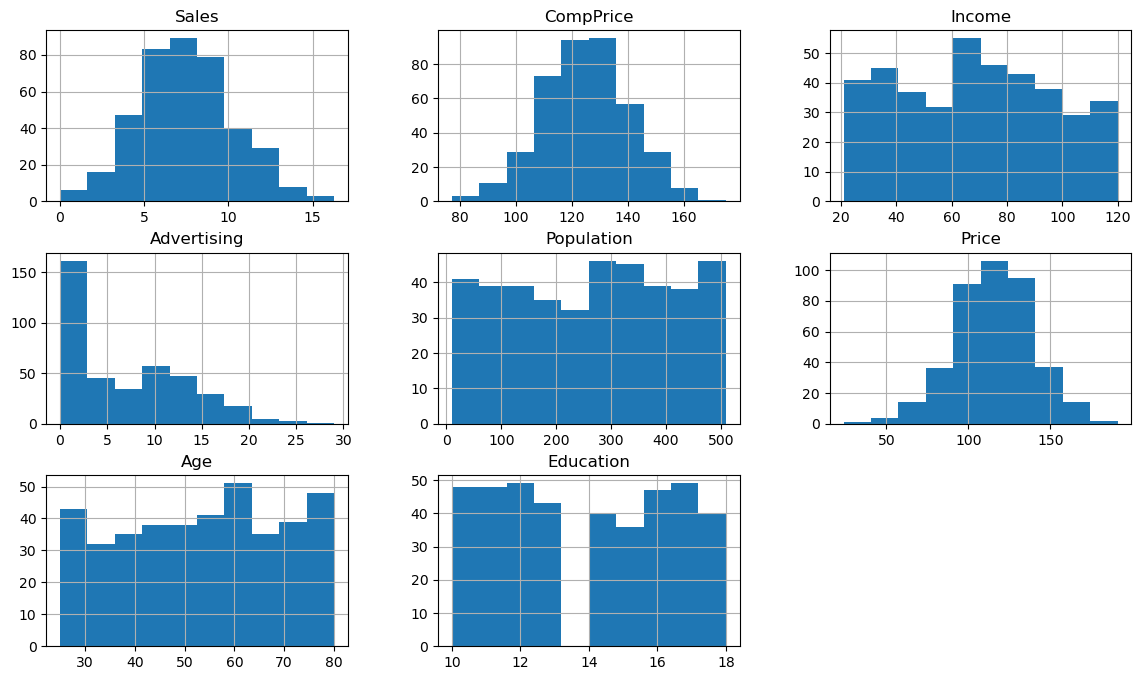

In [534]:
df.hist(figsize=(14,8))
plt.show();

all features are almost Normally Distributed except one feature Advertising which is right skewed

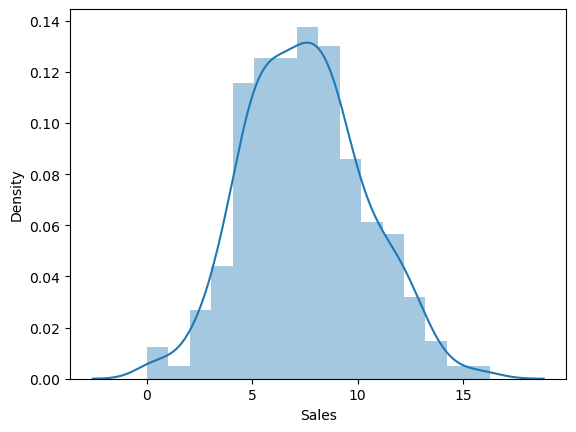

In [535]:
sns.distplot(df.Sales)
plt.show();

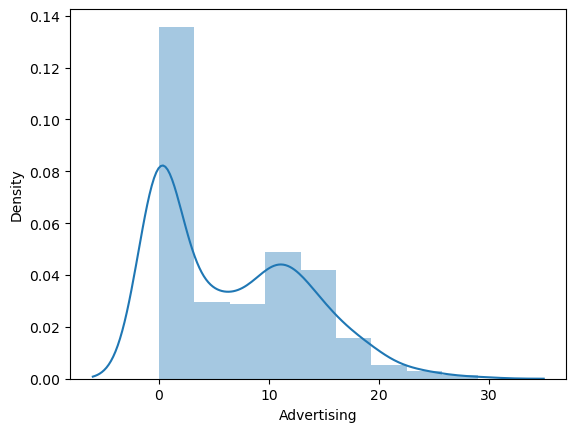

In [536]:
sns.distplot(df.Advertising)
plt.show();

In [537]:
df['Advertising']=np.sqrt(df['Advertising'])

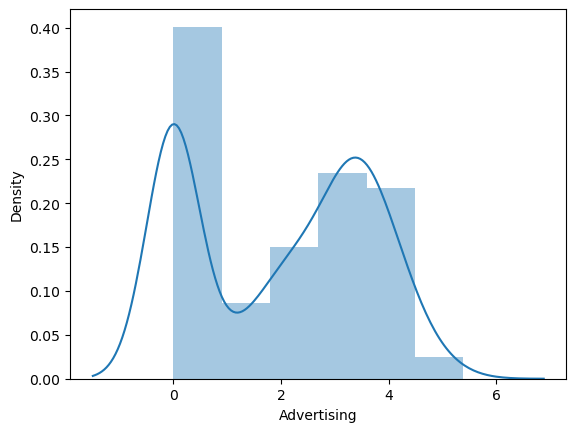

In [538]:
sns.distplot(df.Advertising)
plt.show();

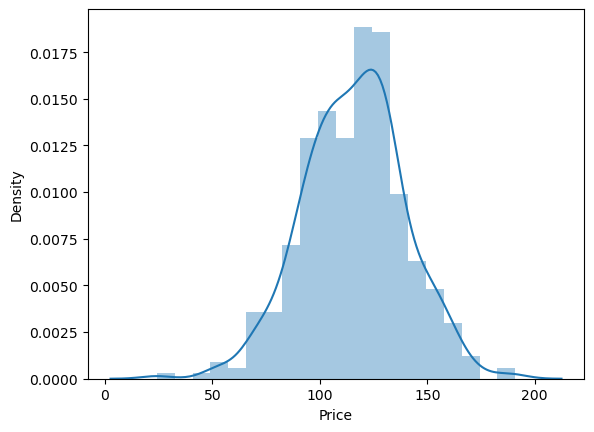

In [539]:
sns.distplot(df.Price)
plt.show();

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    float64
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 34.5+ KB


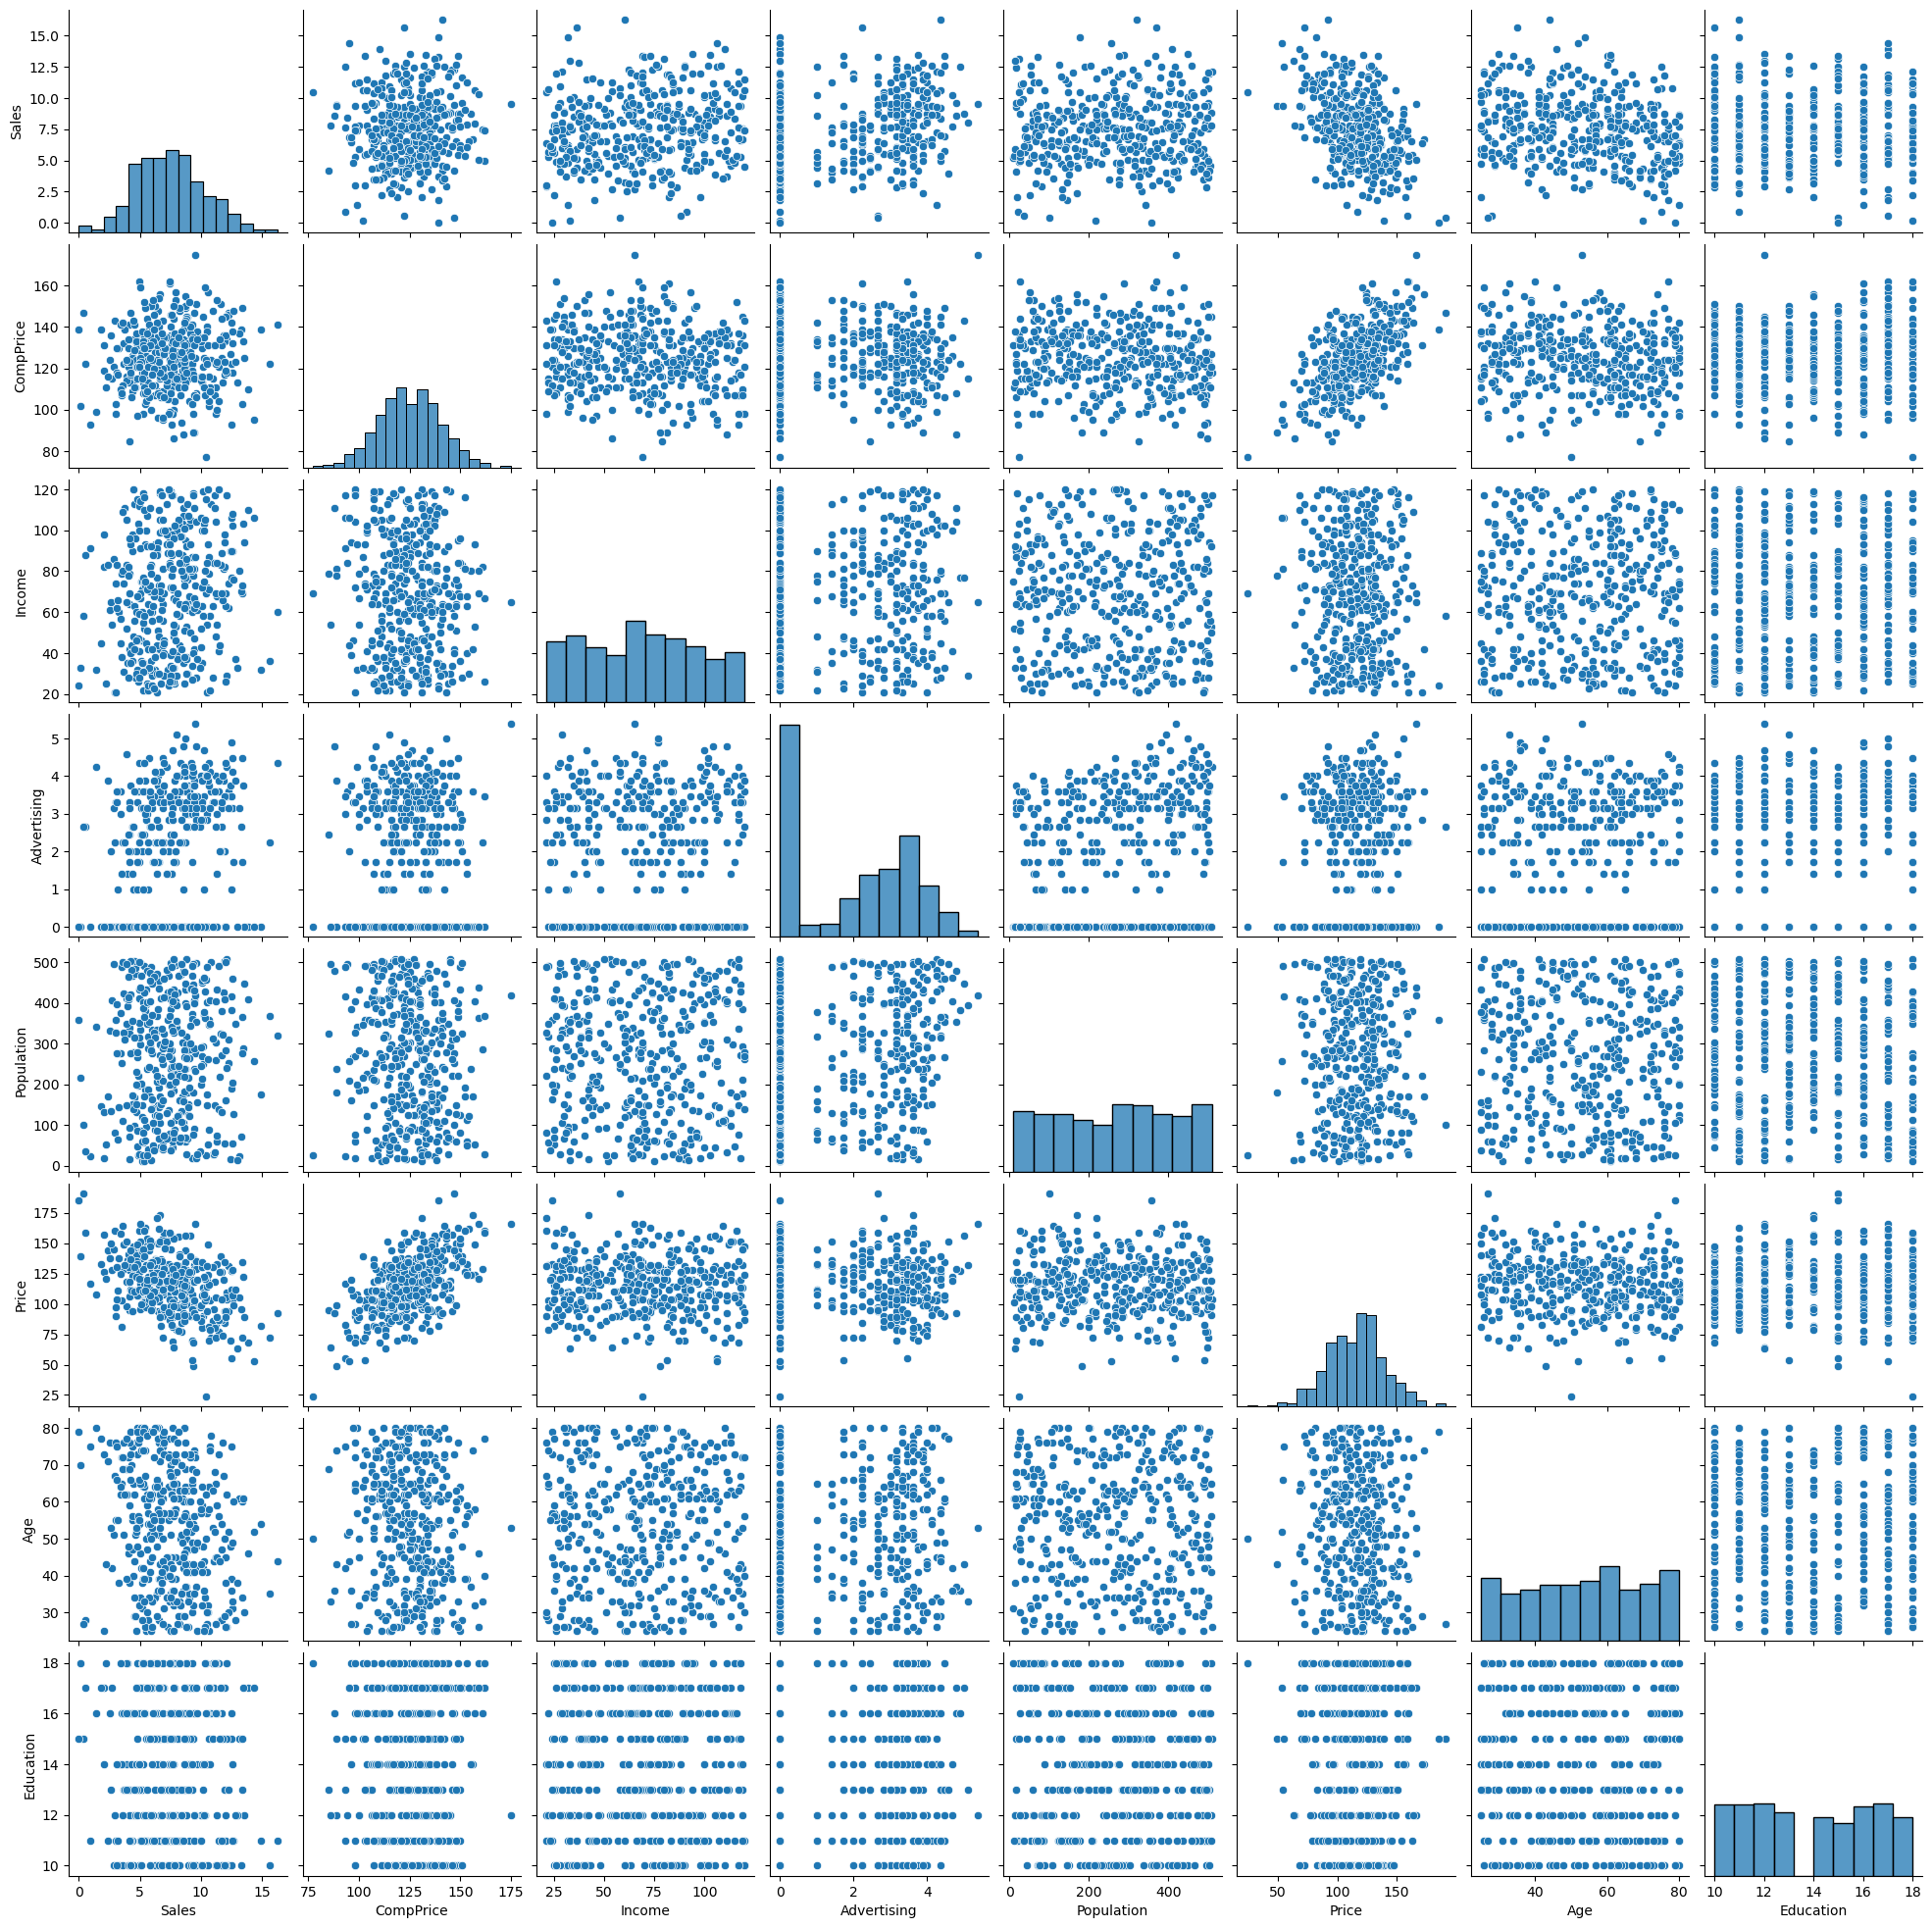

In [541]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df)
plt.show();

sales and price are hightly Negative correlated of each other.and comprice and price are positivly correlated

In [542]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.250264,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.017249,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.054728,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.250264,-0.017249,0.054728,1.000000,0.239937,0.052056,-0.000916,-0.053981
Population,0.050471,-0.094707,-0.007877,0.239937,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.052056,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.000916,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.053981,-0.106378,0.011747,0.006488,1.000000


# converting continueous target feature into category

In [543]:
df['Sales'].max(axis=0)

16.27

In [544]:
df['Sales']=pd.cut(x=df['Sales'],bins=[0,6,11,16.27],labels=['Low','Medium','High'])
df.head(400)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,3.316625,276,120,Bad,42,17,Yes,Yes
1,High,111,48,4.000000,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,3.162278,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,2.000000,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,1.732051,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,4.123106,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,1.732051,37,120,Medium,55,11,No,Yes
397,Medium,162,26,3.464102,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,2.645751,284,95,Bad,50,12,Yes,Yes


In [545]:
df.Sales.unique()

['Medium', 'High', 'Low', NaN]
Categories (3, object): ['Low' < 'Medium' < 'High']

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        399 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    float64 
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
dtypes: category(1), float64(1), int64(6), object(3)
memory usage: 31.9+ KB


In [547]:
df=df.dropna()

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        399 non-null    category
 1   CompPrice    399 non-null    int64   
 2   Income       399 non-null    int64   
 3   Advertising  399 non-null    float64 
 4   Population   399 non-null    int64   
 5   Price        399 non-null    int64   
 6   ShelveLoc    399 non-null    object  
 7   Age          399 non-null    int64   
 8   Education    399 non-null    int64   
 9   Urban        399 non-null    object  
 10  US           399 non-null    object  
dtypes: category(1), float64(1), int64(6), object(3)
memory usage: 34.8+ KB


In [549]:
df['Sales'].value_counts()   # having imbalanced data in target column 

Medium    221
Low       129
High       49
Name: Sales, dtype: int64

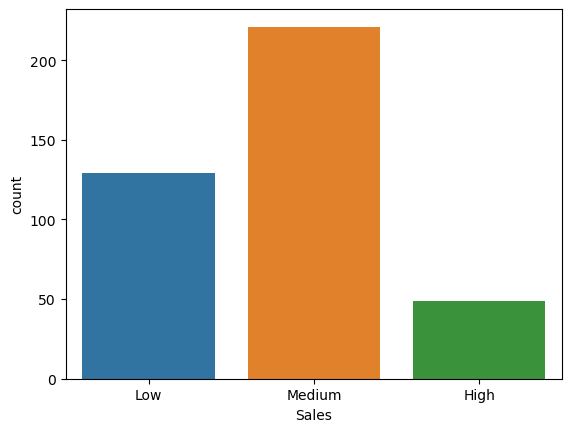

In [550]:
sns.countplot(df['Sales'])
plt.show()

In [551]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Urban']=label_encoder.fit_transform(df['Urban'])
df['US']=label_encoder.fit_transform(df['US'])
df['Sales']=label_encoder.fit_transform(df['Sales'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,3.316625,276,120,Bad,42,17,1,1
1,0,111,48,4.000000,260,83,Good,65,10,1,1
2,2,113,35,3.162278,269,80,Medium,59,12,1,1
3,2,117,100,2.000000,466,97,Medium,55,14,1,1
4,1,141,64,1.732051,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,4.123106,203,128,Good,33,14,1,1
396,2,139,23,1.732051,37,120,Medium,55,11,0,1
397,2,162,26,3.464102,368,159,Medium,40,18,1,1
398,1,100,79,2.645751,284,95,Bad,50,12,1,1


In [552]:
df1=pd.get_dummies(df['ShelveLoc'])
df1.head()

,Bad,Good,Medium
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0


In [553]:
df=pd.concat([df,df1],axis=1)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Bad,Good,Medium
0,2,138,73,3.316625,276,120,Bad,42,17,1,1,1,0,0
1,0,111,48,4.000000,260,83,Good,65,10,1,1,0,1,0
2,2,113,35,3.162278,269,80,Medium,59,12,1,1,0,0,1
3,2,117,100,2.000000,466,97,Medium,55,14,1,1,0,0,1
4,1,141,64,1.732051,340,128,Bad,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,4.123106,203,128,Good,33,14,1,1,0,1,0
396,2,139,23,1.732051,37,120,Medium,55,11,0,1,0,0,1
397,2,162,26,3.464102,368,159,Medium,40,18,1,1,0,0,1
398,1,100,79,2.645751,284,95,Bad,50,12,1,1,1,0,0


In [554]:
df=df.drop(['ShelveLoc'],axis=1)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Bad,Good,Medium
0,2,138,73,3.316625,276,120,42,17,1,1,1,0,0
1,0,111,48,4.000000,260,83,65,10,1,1,0,1,0
2,2,113,35,3.162278,269,80,59,12,1,1,0,0,1
3,2,117,100,2.000000,466,97,55,14,1,1,0,0,1
4,1,141,64,1.732051,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,4.123106,203,128,33,14,1,1,0,1,0
396,2,139,23,1.732051,37,120,55,11,0,1,0,0,1
397,2,162,26,3.464102,368,159,40,18,1,1,0,0,1
398,1,100,79,2.645751,284,95,50,12,1,1,1,0,0


# dividing data into feature and target

In [555]:
y=df['Sales']
X=df.iloc[:,1:]

# data transformation

In [556]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()

In [557]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [558]:
y_train.value_counts()  #imbalanced data

2    155
1     88
0     36
Name: Sales, dtype: int64

Using SMOTE technique to solve imbalance data to not cause biased problem during model training

In [559]:
from sklearn.ensemble import BaggingClassifier
bag_c = BaggingClassifier()

In [560]:
bag_m = bag_c.fit(X_train,y_train)

In [561]:
bag_m.score(X_test,y_test)

0.7666666666666667

In [562]:
bag_m.score(X_train,y_train)

0.985663082437276

# Using SMOTE Technique

In [563]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

In [564]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X_train,y_train)

In [565]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=46)

In [566]:
y_res.value_counts()

2    155
1    155
0    155
Name: Sales, dtype: int64

In [567]:
bag_c = BaggingClassifier()

In [568]:
bag_m1 = bag_c.fit(X_train,y_train)

In [569]:
bag_m1.score(X_test,y_test)

0.7642857142857142

In [570]:
bag_m1.score(X_train,y_train)

0.9846153846153847

# Random Forest Classification

In [571]:
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [572]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=100, max_features=3,random_state=1)
results = cross_val_score(model, X_res, y_res, cv=kfold)
print(results.mean())

0.8366327474560592


# Hyper-parameter tunning with Random Forest Classification

In [573]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100, max_features=3,random_state=3)
results = cross_val_score(model, X_res, y_res, cv=kfold)
print(results.mean())

0.8366327474560592


# AdaBoost Classification

In [574]:
num_trees = 50
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_res, y_res, cv=kfold)
print(results.mean())

0.8366327474560592


# Voting Ensemble for Classification

In [575]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# create the sub models
estimators = []
model3 = LogisticRegression(max_iter=100)
estimators.append(('logistic', model1))
model4 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model5 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_res, y_res, cv=kfold)
print(results.mean())

0.8579093432007401


# Bagged Decision Trees for Classification

In [576]:
seed = 10
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_res, y_res, cv=kfold)
print(results.mean())

0.8519426456984274


# Conclusion 

In [581]:
forest = pd.DataFrame({'Models': ['Random_forest','Adaboost','Votingclassifier','Bagg_Decision'],
                    'Accuracy': ['83.66','83.66','85.79','85.19']})
forest

,Models,Accuracy
0,Random_forest,83.66
1,Adaboost,83.66
2,Votingclassifier,85.79
3,Bagg_Decision,85.19
